# ![Alt text](logo_UTN.svg)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from DSP import * 
from TS3 import *
from scipy import signal

![Alt text](image-3.png)

![Alt text](image-4.png)

In [3]:
# Datos de ADC
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
B = 5 # bits
Vf = 1 # Volts
Rango = 2*Vf

# Sobremuestreo del sistema numerico
# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling

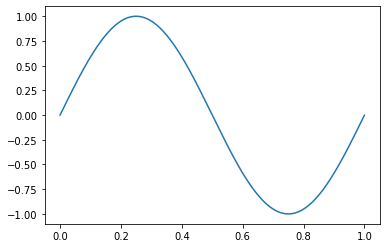

In [4]:
fs_ov = N_os #[Hz] el sistema de numeracion genera muestras de la señal, no es una señal continua
A = 1 # Amplitud normalizada
tt_os, xx = mi_funcion_sen( vmax = A, dc = 0, ff = 1, ph=0, nn = N_os, fs = fs_ov) 

plt.plot(tt_os, xx); plt.style.use('dark_background')
plt.grid(color='white', linestyle='--', linewidth=0.25)

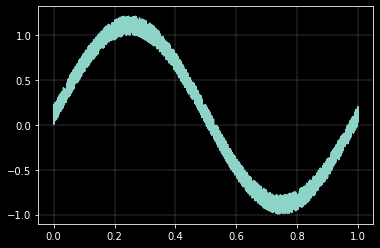

In [5]:
# 1) Etapa Amplificacion 
SNR_Amplificador = 10
xA = Amplificador_de_señal(xx,SNR_Amplificador)

plt.plot(tt_os, xA); plt.style.use('dark_background')
plt.grid(color='white', linestyle='--', linewidth=0.25)

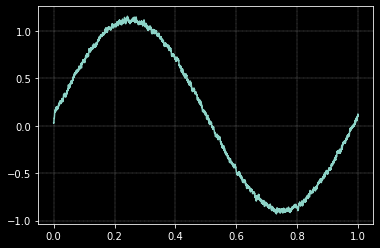

In [6]:
# 2) Etapa Low Pass Filter (Filtro de Desambiguedad)
yLP = filtro_LP(xA)

plt.plot(tt_os, yLP); plt.style.use('dark_background')
plt.grid(color='white', linestyle='--', linewidth=0.25)

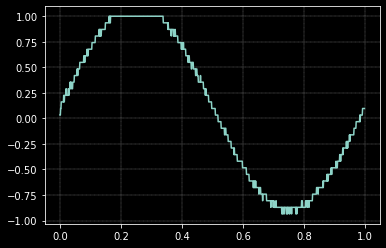

In [7]:
# 3) ADC
yADC, nq, tt, ff = quantize_signal(yLP, over_sampling, Rango, Vf, B, N, fs)

plt.plot(tt, yADC); plt.style.use('dark_background')
plt.grid(color='white', linestyle='--', linewidth=0.25)

Visualice en una misma gráfica sR
 y sQ
, donde se pueda observar que tienen el mismo rango en Volts y el efecto de la cuantización para VF=2
 Volts y  B = 4, 8 y 16 bits

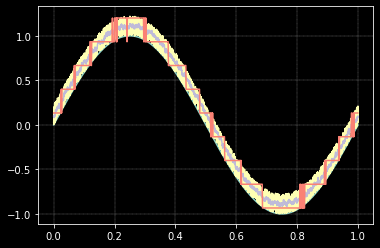

In [8]:
# Datos de ADC
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
B = 4 # bits
Vf = 2 # Volts
Rango = 2*Vf

# Sobremuestreo del sistema numerico
# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling

fs_ov = N_os #[Hz] el sistema de numeracion genera muestras de la señal, no es una señal continua
A = 1 # Amplitud normalizada
tt_os, xx = mi_funcion_sen( vmax = A, dc = 0, ff = 1, ph=0, nn = N_os, fs = fs_ov) 
# 1) Etapa Amplificacion 
SNR_Amplificador = 10
xA = Amplificador_de_señal(xx,SNR_Amplificador)
# 2) Etapa Low Pass Filter (Filtro de Desambiguedad)
yLP = filtro_LP(xA)
# 3) ADC
yADC, nq, tt, ff = quantize_signal(yLP, over_sampling, Rango, Vf, B, N, fs)

plot_signals_time(tt_os, xx, xA, yLP, yADC, tt)

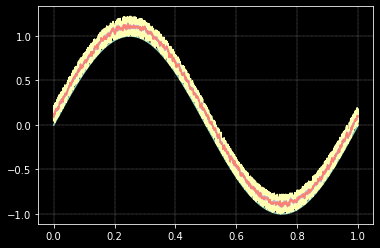

In [9]:
# Datos de ADC
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
B = 8 # bits
Vf = 2 # Volts
Rango = 2*Vf

# Sobremuestreo del sistema numerico
# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling

fs_ov = N_os #[Hz] el sistema de numeracion genera muestras de la señal, no es una señal continua
A = 1 # Amplitud normalizada
tt_os, xx = mi_funcion_sen( vmax = A, dc = 0, ff = 1, ph=0, nn = N_os, fs = fs_ov) 
# 1) Etapa Amplificacion 
SNR_Amplificador = 10
xA = Amplificador_de_señal(xx,SNR_Amplificador)
# 2) Etapa Low Pass Filter (Filtro de Desambiguedad)
yLP = filtro_LP(xA)
# 3) ADC
yADC, nq, tt, ff = quantize_signal(yLP, over_sampling, Rango, Vf, B, N, fs)

plot_signals_time(tt_os, xx, xA, yLP, yADC, tt)

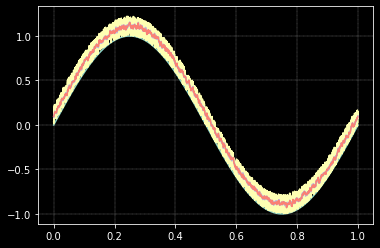

In [10]:
# Datos de ADC
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
B = 16 # bits
Vf = 2 # Volts
Rango = 2*Vf

# Sobremuestreo del sistema numerico
# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling

fs_ov = N_os #[Hz] el sistema de numeracion genera muestras de la señal, no es una señal continua
A = 1 # Amplitud normalizada
tt_os, xx = mi_funcion_sen( vmax = A, dc = 0, ff = 1, ph=0, nn = N_os, fs = fs_ov) 
# 1) Etapa Amplificacion 
SNR_Amplificador = 10
xA = Amplificador_de_señal(xx,SNR_Amplificador)
# 2) Etapa Low Pass Filter (Filtro de Desambiguedad)
yLP = filtro_LP(xA)
# 3) ADC
yADC, nq, tt, ff = quantize_signal(yLP, over_sampling, Rango, Vf, B, N, fs)

plot_signals_time(tt_os, xx, xA, yLP, yADC, tt)

Se puede ver que la distribucion de probabilidad es uniforme
La media tiende a cero: mean(nq)= 6.601219589171752e-07
Tienen misma Varianza = var(nq) = 3.10041811483086e-10 = q**2/12 = 3.104503323251478e-10


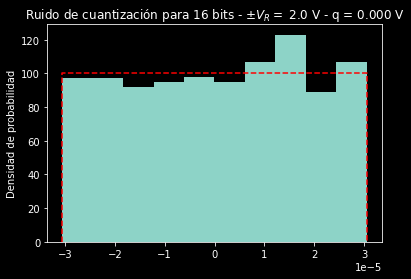

In [23]:
# Verificacion de Distribucion Uniforme
q = Rango/((2**B)-1) # Volts, q = Rango / Niveles

plt.figure(3)
bins = 10
plt.hist(nq, bins=bins)
plt.ylabel('Densidad de probabilidad')

plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

print("Se puede ver que la distribucion de probabilidad es uniforme")
print("La media tiende a cero: mean(nq)=",np.mean(nq))

print("Tienen misma Varianza = var(nq) =", np.var(nq),"= q**2/12 =",(q**2)/12)


In [25]:
from scipy.stats import pearsonr

# Analisis de la Correlacion: 0 = no correlado ; 1 = muy correlado
# Definir dos vectores
vector1 = yADC
vector2 = nq

# Calcular la correlación y el valor p
correlation, p_value = pearsonr(vector1, vector2)

print(f"Correlación entre vector1 y vector2: {correlation}")
print("Vemos que no tienen correlacion")
print(f"Valor p: {p_value}")

Correlación entre vector1 y vector2: 0.02361704834164652
Valor p: 0.45566342192507414
